In [573]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from pyecharts.charts import Pie,Map,Bar,Line,Grid,Page
from pyecharts import options as opts

# 在jupyterlab中使用pyecharts需要使用如下设置
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

In [574]:
# 显示汉字
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正确显示中文
plt.rcParams['axes.unicode_minus'] = False # 用来正确显示负号

In [575]:
bj = pd.read_csv('./source/北京二手房数据.csv')

In [576]:
bj

,title,detailUrl,position,houseInfo,followInfo,tagInfo,totalPrice,unitPrice,county
0,立水桥 北京北小区 视野特别好 税费也少,https://bj.lianjia.com/ershoufang/101103274797...,"['北京北 ', '立水桥']",2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,271人关注 / 一年前发布,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平
1,南北通透 全明格局 品质住宅 楼层高 观森林公园,https://bj.lianjia.com/ershoufang/101104923604...,"['招商嘉铭珑原 ', '立水桥']",3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,150人关注 / 一年前发布,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平
2,此房满五年唯一，有电梯，周边配套齐全,https://bj.lianjia.com/ershoufang/101108510562...,"['南环里 ', '鼓楼大街']",1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,15人关注 / 15天以前发布,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平
3,玫瑰园别墅，联排西边户，小区环境好,https://bj.lianjia.com/ershoufang/101108623996...,"['玫瑰园 ', '沙河']",5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,19人关注 / 5天以前发布,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平
4,急售！南北通透 全明格局三居一层带花园100平看房方便,https://bj.lianjia.com/ershoufang/101108633440...,"['蓬莱公寓东区 ', '北七家']",3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,11人关注 / 5天以前发布,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平
...,...,...,...,...,...,...,...,...,...
33551,满五年个税1% 2层！南北通透三居！诚心出售,https://bj.lianjia.com/ershoufang/101108062964...,"['右安门内西街1号院 ', '右安门内']",3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...,19人关注 / 1个月以前发布,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城
33552,壹瓶三期：陶然庭 东西双通透 精装三居 眼镜户型,https://bj.lianjia.com/ershoufang/101108063739...,"['一瓶 ', '陶然亭']",3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...,24人关注 / 1个月以前发布,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城
33553,月坛低总价两居室，满五年成本价购买,https://bj.lianjia.com/ershoufang/101108063925...,"['南礼士路三条北里 ', '月坛']",2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼,19人关注 / 1个月以前发布,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城
33554,西城二环边 东南三居 高楼层视野好 三世同堂 满五唯一,https://bj.lianjia.com/ershoufang/101108067705...,"['荣丰2008 ', '广安门']",3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...,42人关注 / 1个月以前发布,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城


In [577]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33556 entries, 0 to 33555
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       33556 non-null  object
 1   detailUrl   33556 non-null  object
 2   position    33556 non-null  object
 3   houseInfo   33556 non-null  object
 4   followInfo  33556 non-null  object
 5   tagInfo     33556 non-null  object
 6   totalPrice  33556 non-null  object
 7   unitPrice   33556 non-null  object
 8   county      33556 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


# 初步处理

In [578]:
# 去除重复
bj.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
33551    False
33552    False
33553    False
33554    False
33555    False
Length: 33556, dtype: bool

In [579]:
bj.duplicated().sum() # 重复行数

61

In [580]:
# 去重
bj = bj.drop_duplicates() # 去重

In [581]:
bj.duplicated().sum()

0

In [582]:
bj

,title,detailUrl,position,houseInfo,followInfo,tagInfo,totalPrice,unitPrice,county
0,立水桥 北京北小区 视野特别好 税费也少,https://bj.lianjia.com/ershoufang/101103274797...,"['北京北 ', '立水桥']",2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,271人关注 / 一年前发布,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平
1,南北通透 全明格局 品质住宅 楼层高 观森林公园,https://bj.lianjia.com/ershoufang/101104923604...,"['招商嘉铭珑原 ', '立水桥']",3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,150人关注 / 一年前发布,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平
2,此房满五年唯一，有电梯，周边配套齐全,https://bj.lianjia.com/ershoufang/101108510562...,"['南环里 ', '鼓楼大街']",1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,15人关注 / 15天以前发布,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平
3,玫瑰园别墅，联排西边户，小区环境好,https://bj.lianjia.com/ershoufang/101108623996...,"['玫瑰园 ', '沙河']",5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,19人关注 / 5天以前发布,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平
4,急售！南北通透 全明格局三居一层带花园100平看房方便,https://bj.lianjia.com/ershoufang/101108633440...,"['蓬莱公寓东区 ', '北七家']",3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,11人关注 / 5天以前发布,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平
...,...,...,...,...,...,...,...,...,...
33551,满五年个税1% 2层！南北通透三居！诚心出售,https://bj.lianjia.com/ershoufang/101108062964...,"['右安门内西街1号院 ', '右安门内']",3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...,19人关注 / 1个月以前发布,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城
33552,壹瓶三期：陶然庭 东西双通透 精装三居 眼镜户型,https://bj.lianjia.com/ershoufang/101108063739...,"['一瓶 ', '陶然亭']",3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...,24人关注 / 1个月以前发布,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城
33553,月坛低总价两居室，满五年成本价购买,https://bj.lianjia.com/ershoufang/101108063925...,"['南礼士路三条北里 ', '月坛']",2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼,19人关注 / 1个月以前发布,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城
33554,西城二环边 东南三居 高楼层视野好 三世同堂 满五唯一,https://bj.lianjia.com/ershoufang/101108067705...,"['荣丰2008 ', '广安门']",3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...,42人关注 / 1个月以前发布,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城


In [583]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33495 entries, 0 to 33555
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       33495 non-null  object
 1   detailUrl   33495 non-null  object
 2   position    33495 non-null  object
 3   houseInfo   33495 non-null  object
 4   followInfo  33495 non-null  object
 5   tagInfo     33495 non-null  object
 6   totalPrice  33495 non-null  object
 7   unitPrice   33495 non-null  object
 8   county      33495 non-null  object
dtypes: object(9)
memory usage: 2.6+ MB


In [584]:
# 删除列 drop默认为0按行删为1时是按列删
bj = bj.drop(['title','detailUrl','position','followInfo'],axis=1)

In [585]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33495 entries, 0 to 33555
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   houseInfo   33495 non-null  object
 1   tagInfo     33495 non-null  object
 2   totalPrice  33495 non-null  object
 3   unitPrice   33495 non-null  object
 4   county      33495 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


# 提取信息

In [586]:
bj['houseInfo']

0        2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...
1        3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...
2        1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...
3        5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼
4        3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...
                               ...                        
33551    3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...
33552    3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...
33553    2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼
33554    3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...
33555    3室2厅 | 138.66平米 | 东南 | 精装 | 高楼层(共19层) | 2001年建...
Name: houseInfo, Length: 33495, dtype: object

In [587]:
type(bj['houseInfo'])

pandas.core.series.Series

In [588]:
bj['houseInfo'].str

In [589]:
bj['houseInfo'][0]

'2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 | 板塔结合'

In [590]:
# 提取室厅
# 正则提取室
bj['houseInfo'].str.split("|").str[0].str.extract(r'(\d+)[\s\S]*(\d+)')[0]

0        2
1        3
2        1
3        5
4        3
        ..
33551    3
33552    3
33553    2
33554    3
33555    3
Name: 0, Length: 33495, dtype: object

In [591]:
# 正则提取厅
bj['houseInfo'].str.split("|").str[0].str.extract(r'(\d+)[\s\S]*(\d+)')[1]

0        1
1        1
2        0
3        2
4        2
        ..
33551    1
33552    2
33553    1
33554    2
33555    2
Name: 1, Length: 33495, dtype: object

In [592]:
# 正则提取室
bj['halls'] = bj['houseInfo'].str.split("|").str[0].str.extract(r'(\d+)[\s\S]*(\d+)')[0]
bj['bedrooms'] = bj['houseInfo'].str.split("|").str[0].str.extract(r'(\d+)[\s\S]*(\d+)')[1]

In [593]:
bj

,houseInfo,tagInfo,totalPrice,unitPrice,county,halls,bedrooms
0,2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1
1,3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1
2,1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0
3,5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2
4,3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2
...,...,...,...,...,...,...,...
33551,3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1
33552,3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2
33553,2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1
33554,3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2


In [594]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33495 entries, 0 to 33555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   houseInfo   33495 non-null  object
 1   tagInfo     33495 non-null  object
 2   totalPrice  33495 non-null  object
 3   unitPrice   33495 non-null  object
 4   county      33495 non-null  object
 5   halls       33433 non-null  object
 6   bedrooms    33433 non-null  object
dtypes: object(7)
memory usage: 3.1+ MB


In [595]:
# 提取面积
bj['houseInfo'].str.split("|").str[1].str.extract(r'(\d+\.\d+)')

,0
0,81.49
1,175.91
2,36.3
3,245.6
4,145.14
...,...
33551,90.46
33552,151.24
33553,53.2
33554,169.36


In [596]:
bj['area'] = bj['houseInfo'].str.split("|").str[1].str.extract(r'(\d+\.\d+)')

In [597]:
bj

,houseInfo,tagInfo,totalPrice,unitPrice,county,halls,bedrooms,area
0,2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49
1,3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91
2,1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3
3,5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6
4,3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14
...,...,...,...,...,...,...,...,...
33551,3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1,90.46
33552,3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2,151.24
33553,2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1,53.2
33554,3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2,169.36


In [598]:
bj['houseInfo'].str.split("|").str[2]

0            东南 
1           南 北 
2             西 
3           南 北 
4         南 北 西 
          ...   
33551       南 北 
33552       东 西 
33553       东 西 
33554        东南 
33555        东南 
Name: houseInfo, Length: 33495, dtype: object

In [599]:
# 提起朝向
bj['orient'] = bj['houseInfo'].str.split("|").str[2]

In [600]:
bj

,houseInfo,tagInfo,totalPrice,unitPrice,county,halls,bedrooms,area,orient
0,2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南
1,3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北
2,1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3,西
3,5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北
4,3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西
...,...,...,...,...,...,...,...,...,...
33551,3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1,90.46,南 北
33552,3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2,151.24,东 西
33553,2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1,53.2,东 西
33554,3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2,169.36,东南


In [601]:
# 提取装修类型
bj['houseInfo'].str.split("|").str[3]

0         简装 
1         精装 
2         简装 
3         精装 
4         精装 
         ... 
33551     其他 
33552     精装 
33553     简装 
33554     精装 
33555     精装 
Name: houseInfo, Length: 33495, dtype: object

In [602]:
bj['decorateType'] = bj['houseInfo'].str.split("|").str[3]

In [603]:
bj

,houseInfo,tagInfo,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType
0,2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南,简装
1,3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北,精装
2,1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3,西,简装
3,5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北,精装
4,3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西,精装
...,...,...,...,...,...,...,...,...,...,...
33551,3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1,90.46,南 北,其他
33552,3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2,151.24,东 西,精装
33553,2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1,53.2,东 西,简装
33554,3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2,169.36,东南,精装


In [604]:
# 提取楼层数量
bj['houseInfo'].str.split("|").str[4]

0         中楼层(共20层) 
1         高楼层(共14层) 
2         高楼层(共10层) 
3           底层(共3层) 
4           底层(共6层) 
            ...     
33551      低楼层(共7层) 
33552     低楼层(共13层) 
33553      地下室(共6层) 
33554     中楼层(共14层) 
33555     高楼层(共19层) 
Name: houseInfo, Length: 33495, dtype: object

In [605]:
bj['floor'] = bj['houseInfo'].str.split("|").str[4]

In [606]:
bj

,houseInfo,tagInfo,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,floor
0,2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南,简装,中楼层(共20层)
1,3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北,精装,高楼层(共14层)
2,1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3,西,简装,高楼层(共10层)
3,5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北,精装,底层(共3层)
4,3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西,精装,底层(共6层)
...,...,...,...,...,...,...,...,...,...,...,...
33551,3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1,90.46,南 北,其他,低楼层(共7层)
33552,3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2,151.24,东 西,精装,低楼层(共13层)
33553,2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1,53.2,东 西,简装,地下室(共6层)
33554,3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2,169.36,东南,精装,中楼层(共14层)


In [607]:
# 提取年份
bj['houseInfo'].str.split("|").str[5].str.extract(r'(\d+)')

,0
0,2008
1,2012
2,2004
3,2000
4,2001
...,...
33551,1990
33552,2009
33553,1987
33554,2003


In [608]:
bj['buildYear'] = bj['houseInfo'].str.split("|").str[5].str.extract(r'(\d+)')

In [609]:
bj

,houseInfo,tagInfo,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,floor,buildYear
0,2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008
1,3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012
2,1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3,西,简装,高楼层(共10层),2004
3,5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北,精装,底层(共3层),2000
4,3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001
...,...,...,...,...,...,...,...,...,...,...,...,...
33551,3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1,90.46,南 北,其他,低楼层(共7层),1990
33552,3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2,151.24,东 西,精装,低楼层(共13层),2009
33553,2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1,53.2,东 西,简装,地下室(共6层),1987
33554,3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2,169.36,东南,精装,中楼层(共14层),2003


In [610]:
# 提取板塔
bj['houseInfo'].str.split("|").str[6]

0         板塔结合
1           板楼
2         板塔结合
3           板楼
4           板楼
         ...  
33551       板楼
33552       板楼
33553       板楼
33554       塔楼
33555       塔楼
Name: houseInfo, Length: 33495, dtype: object

In [611]:
bj['banta'] = bj['houseInfo'].str.split("|").str[6]

In [612]:
bj

,houseInfo,tagInfo,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,floor,buildYear,banta
0,2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合
1,3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼
2,1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合
3,5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼
4,3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33551,3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1,90.46,南 北,其他,低楼层(共7层),1990,板楼
33552,3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2,151.24,东 西,精装,低楼层(共13层),2009,板楼
33553,2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1,53.2,东 西,简装,地下室(共6层),1987,板楼
33554,3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2,169.36,东南,精装,中楼层(共14层),2003,塔楼


In [613]:
bj = bj.drop("houseInfo",axis=1)

In [614]:
bj

,tagInfo,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,floor,buildYear,banta
0,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合
1,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼
2,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合
3,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼
4,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼
...,...,...,...,...,...,...,...,...,...,...,...,...
33551,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1,90.46,南 北,其他,低楼层(共7层),1990,板楼
33552,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2,151.24,东 西,精装,低楼层(共13层),2009,板楼
33553,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1,53.2,东 西,简装,地下室(共6层),1987,板楼
33554,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2,169.36,东南,精装,中楼层(共14层),2003,塔楼


In [615]:
bj['subway'] = [1 if '地铁' in i else 0 for i in bj['tagInfo']]

In [616]:
bj

,tagInfo,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,floor,buildYear,banta,subway
0,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合,0
3,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼,0
4,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33551,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1,90.46,南 北,其他,低楼层(共7层),1990,板楼,0
33552,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2,151.24,东 西,精装,低楼层(共13层),2009,板楼,0
33553,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1,53.2,东 西,简装,地下室(共6层),1987,板楼,1
33554,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2,169.36,东南,精装,中楼层(共14层),2003,塔楼,0


In [617]:
bj = bj.drop("tagInfo", axis=1)

In [618]:
bj

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,floor,buildYear,banta,subway
0,"['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,"['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,"['165', '万']",单价45455元/平米,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合,0
3,"['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼,0
4,"['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33551,"['920', '万']",单价101703元/平米,西城,3,1,90.46,南 北,其他,低楼层(共7层),1990,板楼,0
33552,"['1950', '万']",单价128935元/平米,西城,3,2,151.24,东 西,精装,低楼层(共13层),2009,板楼,0
33553,"['499', '万']",单价93797元/平米,西城,2,1,53.2,东 西,简装,地下室(共6层),1987,板楼,1
33554,"['1380', '万']",单价81484元/平米,西城,3,2,169.36,东南,精装,中楼层(共14层),2003,塔楼,0


In [619]:
bj['totalPrice']

0         ['455', '万']
1        ['1250', '万']
2         ['165', '万']
3        ['1150', '万']
4         ['515', '万']
             ...      
33551     ['920', '万']
33552    ['1950', '万']
33553     ['499', '万']
33554    ['1380', '万']
33555    ['1159', '万']
Name: totalPrice, Length: 33495, dtype: object

In [620]:
type(bj['totalPrice'])

pandas.core.series.Series

In [621]:
import re
# after = []
# for item in bj['totalPrice']:
#     after.append(re.sub(r'\[|\]', "", item))
# # print(after)
# bj['totalPrice1'] = []

def translate(i):
    return re.sub(r'\[|\]|\'', "", i)
bj['totalPrice'] = [translate(i) for i in bj['totalPrice']]

In [622]:
bj['totalPrice']

0         455, 万
1        1250, 万
2         165, 万
3        1150, 万
4         515, 万
          ...   
33551     920, 万
33552    1950, 万
33553     499, 万
33554    1380, 万
33555    1159, 万
Name: totalPrice, Length: 33495, dtype: object

In [623]:
bj['totalPrice'].str.split(",").str[0]
# .astype(str)

0         455
1        1250
2         165
3        1150
4         515
         ... 
33551     920
33552    1950
33553     499
33554    1380
33555    1159
Name: totalPrice, Length: 33495, dtype: object

In [624]:
# bj['totalPrice'] = [int(i) for i in bj['totalPrice']]
bj['totalPrice'] = bj['totalPrice'].str.split(",").str[0]

In [625]:
bj['unitPrice'].str.extract(r'(\d+)')

,0
0,55836
1,71060
2,45455
3,46825
4,35483
...,...
33551,101703
33552,128935
33553,93797
33554,81484


In [626]:
bj['unitPrice'] = bj['unitPrice'].str.extract(r'(\d+)')

In [627]:
bj

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,floor,buildYear,banta,subway
0,455,55836,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,1250,71060,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,165,45455,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合,0
3,1150,46825,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼,0
4,515,35483,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33551,920,101703,西城,3,1,90.46,南 北,其他,低楼层(共7层),1990,板楼,0
33552,1950,128935,西城,3,2,151.24,东 西,精装,低楼层(共13层),2009,板楼,0
33553,499,93797,西城,2,1,53.2,东 西,简装,地下室(共6层),1987,板楼,1
33554,1380,81484,西城,3,2,169.36,东南,精装,中楼层(共14层),2003,塔楼,0


In [628]:
# 空值删除
bj = bj.dropna()

In [629]:
bj

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,floor,buildYear,banta,subway
0,455,55836,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,1250,71060,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,165,45455,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合,0
3,1150,46825,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼,0
4,515,35483,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33551,920,101703,西城,3,1,90.46,南 北,其他,低楼层(共7层),1990,板楼,0
33552,1950,128935,西城,3,2,151.24,东 西,精装,低楼层(共13层),2009,板楼,0
33553,499,93797,西城,2,1,53.2,东 西,简装,地下室(共6层),1987,板楼,1
33554,1380,81484,西城,3,2,169.36,东南,精装,中楼层(共14层),2003,塔楼,0


In [630]:
# 转换数据类型
# temp = bj.loc[:,'totalPrice'].astype(float)
# bj.loc[:,'totalPrice'] = temp.copy()
# bj.loc[:,'totalPrice'] = bj.loc[:,'totalPrice']

bj_copy = bj.copy()

bj_copy.loc[:,'totalPrice'] = bj_copy.loc[:,'totalPrice'].astype(float).copy()
bj_copy.loc[:,'unitPrice'] = bj_copy['unitPrice'].astype(float).copy()
bj_copy.loc[:,'halls'] = bj_copy['halls'].astype(int).copy()
bj_copy.loc[:,'bedrooms'] = bj_copy['bedrooms'].astype(int).copy()
bj_copy.loc[:,'area'] = bj_copy['area'].astype(float).copy()
bj_copy.loc[:,'buildYear'] = bj_copy['buildYear'].astype(int).copy()
bj_copy.loc[:,'subway'] = bj_copy['subway'].astype(int).copy()
bj_copy.head()


,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,floor,buildYear,banta,subway
0,455.0,55836.0,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,1250.0,71060.0,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,165.0,45455.0,昌平,1,0,36.30,西,简装,高楼层(共10层),2004,板塔结合,0
3,1150.0,46825.0,昌平,5,2,245.60,南 北,精装,底层(共3层),2000,板楼,0
4,515.0,35483.0,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0


In [631]:
bj = bj_copy

In [632]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31897 entries, 0 to 33555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   totalPrice    31897 non-null  float64
 1   unitPrice     31897 non-null  float64
 2   county        31897 non-null  object 
 3   halls         31897 non-null  int32  
 4   bedrooms      31897 non-null  int32  
 5   area          31897 non-null  float64
 6   orient        31897 non-null  object 
 7   decorateType  31897 non-null  object 
 8   floor         31897 non-null  object 
 9   buildYear     31897 non-null  int32  
 10  banta         31897 non-null  object 
 11  subway        31897 non-null  int32  
dtypes: float64(3), int32(4), object(5)
memory usage: 2.7+ MB


In [633]:
def translate_floor(x):
    if x == '高楼层' or x == '顶层' or x == '上叠':
        return '高层'
    elif x == '低楼层' or x == '底层' or x == '下叠' or x == '1层' or x == '2层' or x == '3层':
        return '低层'
    elif x == '中楼层' or x == '4层' or x == '5层':
        return '中层'
    elif x == '地下室':
        return '地下室'
    else:
        return '高层' # 其他情况视为高层
    
# floor转换
bj['floorType'] = [re.sub(r'\([\s\S]+\)', "", i).strip() for i in bj['floor']]
bj['floorType'] = bj.floorType.apply(translate_floor)
bj = bj.drop('floor', axis=1)


In [634]:
bj

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,buildYear,banta,subway,floorType
0,455.0,55836.0,昌平,2,1,81.49,东南,简装,2008,板塔结合,1,中层
1,1250.0,71060.0,昌平,3,1,175.91,南 北,精装,2012,板楼,0,高层
2,165.0,45455.0,昌平,1,0,36.30,西,简装,2004,板塔结合,0,高层
3,1150.0,46825.0,昌平,5,2,245.60,南 北,精装,2000,板楼,0,低层
4,515.0,35483.0,昌平,3,2,145.14,南 北 西,精装,2001,板楼,0,低层
...,...,...,...,...,...,...,...,...,...,...,...,...
33551,920.0,101703.0,西城,3,1,90.46,南 北,其他,1990,板楼,0,低层
33552,1950.0,128935.0,西城,3,2,151.24,东 西,精装,2009,板楼,0,低层
33553,499.0,93797.0,西城,2,1,53.20,东 西,简装,1987,板楼,1,地下室
33554,1380.0,81484.0,西城,3,2,169.36,东南,精装,2003,塔楼,0,中层


In [635]:
# orient转换
bj['orient'] = bj['orient'].str.extract(r'([\u4e00-\u9fa5])')

In [636]:
# 建造年份
bj['buildYear'] = 2021 - bj['buildYear']

In [637]:
# banta结构
bj['banta'] = bj.banta.str.strip()
bj.head()

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,buildYear,banta,subway,floorType
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层
3,1150.0,46825.0,昌平,5,2,245.60,南,精装,21,板楼,0,低层
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,低层


In [638]:
bj

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,buildYear,banta,subway,floorType
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层
3,1150.0,46825.0,昌平,5,2,245.60,南,精装,21,板楼,0,低层
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,低层
...,...,...,...,...,...,...,...,...,...,...,...,...
33551,920.0,101703.0,西城,3,1,90.46,南,其他,31,板楼,0,低层
33552,1950.0,128935.0,西城,3,2,151.24,东,精装,12,板楼,0,低层
33553,499.0,93797.0,西城,2,1,53.20,东,简装,34,板楼,1,地下室
33554,1380.0,81484.0,西城,3,2,169.36,东,精装,18,塔楼,0,中层


In [639]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31897 entries, 0 to 33555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   totalPrice    31897 non-null  float64
 1   unitPrice     31897 non-null  float64
 2   county        31897 non-null  object 
 3   halls         31897 non-null  int32  
 4   bedrooms      31897 non-null  int32  
 5   area          31897 non-null  float64
 6   orient        31897 non-null  object 
 7   decorateType  31897 non-null  object 
 8   buildYear     31897 non-null  int32  
 9   banta         31897 non-null  object 
 10  subway        31897 non-null  int32  
 11  floorType     31897 non-null  object 
dtypes: float64(3), int32(4), object(5)
memory usage: 2.7+ MB


# 二手房处于什么价位？

In [640]:
# 价格分割点
bins = [74,300,500,800,1000,8299]
bins_label = ['300万以下','300-500万','500-800万','800-1000万','1000万以上'] # 标签
# 对总价进行分割 分箱操作
bj['priceCut'] = pd.cut(bj['totalPrice'],bins=bins,labels=bins_label)
bj.head()


,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,buildYear,banta,subway,floorType,priceCut
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层,300-500万
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层,1000万以上
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层,300万以下
3,1150.0,46825.0,昌平,5,2,245.60,南,精装,21,板楼,0,低层,1000万以上
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,低层,500-800万


In [641]:
type(bj.priceCut)

pandas.core.series.Series

In [642]:
bj.priceCut.value_counts()  # 分组 统计 排序 已经由Series做了

300-500万     11409
500-800万      8372
300万以下        6426
1000万以上       3284
800-1000万     2392
Name: priceCut, dtype: int64

In [643]:
# 
price_num = bj.priceCut.value_counts()

data_pair = [list(z) for z in zip(price_num.index.tolist(), price_num.values.tolist())]
data_pair

[['300-500万', 11409],
 ['500-800万', 8372],
 ['300万以下', 6426],
 ['1000万以上', 3284],
 ['800-1000万', 2392]]

In [644]:
# 绘图
piel = Pie(init_opts=opts.InitOpts(width='800px',height='750px'))
piel.add('',data_pair=data_pair, radius=['30%','60%'],rosetype='radius')
piel.set_global_opts(title_opts=opts.TitleOpts(title='北京二手房都处于什么价位？'),
                    legend_opts=opts.LegendOpts(orient='vertical',pos_top='15%',pos_left='2%'))
piel.set_series_opts(label_opts=opts.LabelOpts(formatter='{b}:{d}%'))
piel.set_colors(['#ff7f0e','#1f77b4','#2ca02c','#d62728','#946c8b'])


In [645]:
piel.load_javascript()

In [646]:
# piel.render("北京二手房都处在哪些价位.html")
piel.render_notebook()

# 北京不同区域的二手房源数量

In [647]:
region_name = bj.groupby('county')['totalPrice'].count().index.tolist()

house_num = bj.groupby('county')['totalPrice'].count().values

# 数据源
bj_region = pd.DataFrame({
    'region_name': region_name,
    'house_num': house_num
})
bj_region = bj_region.sort_values('house_num', ascending=False)

# 产生数据
x_data = bj_region['region_name'].values.tolist()
y_data = bj_region['house_num'].values.tolist()

# 条形图
bar1 = Bar(init_opts=opts.InitOpts(width='1200px',height='750px'))
bar1.add_xaxis(x_data)
bar1.add_yaxis('',y_data)
bar1.set_global_opts(title_opts=opts.TitleOpts(title='北京不同区域二手房源数量')
                    ,visualmap_opts=opts.VisualMapOpts(max_=3000))


In [648]:
bar1.load_javascript()
bar1.render_notebook()

# 北京不同区域的均价

In [649]:
bj.head()

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,buildYear,banta,subway,floorType,priceCut
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层,300-500万
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层,1000万以上
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层,300万以下
3,1150.0,46825.0,昌平,5,2,245.60,南,精装,21,板楼,0,低层,1000万以上
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,低层,500-800万


In [650]:
bj.totalPrice.describe()

count    31897.000000
mean       580.141581
std        425.896679
min         55.000000
25%        325.000000
50%        460.000000
75%        685.000000
max       8299.000000
Name: totalPrice, dtype: float64

In [651]:
# 条形图
region_name = bj.groupby('county')['totalPrice'].count().index.tolist()
house_avg_price = np.around(bj.groupby('county')['totalPrice'].mean().values,2) # 保留两位小数
# 数据框
bj_region = pd.DataFrame({
    'region_name': region_name,
    'house_avg_price': house_avg_price
})
bj_region = bj_region.sort_values('house_avg_price',ascending=False)
# 产生数据
x_data = bj_region['region_name'].values.tolist()
y_data = bj_region['house_avg_price'].values.tolist()

bar2 = Bar(init_opts=opts.InitOpts(width='1350px',height='750px'))
bar2.add_xaxis(x_data)
bar2.add_yaxis('',y_data)
bar2.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=1000))


In [652]:
bar2.load_javascript()
bar2.render_notebook()

<AxesSubplot:>

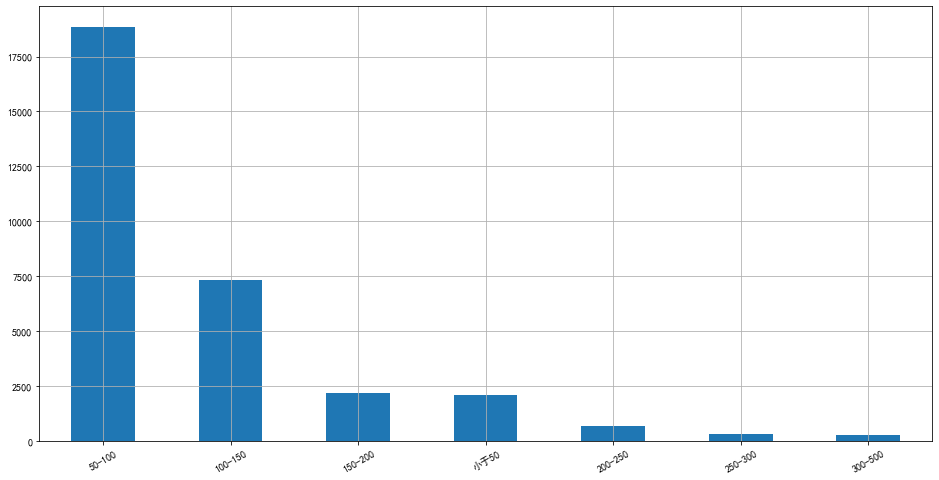

In [653]:
# 面积分布
# 解决中文报错问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

area_level = [0,50,100,150,200,250,300,500]
label_level = ['小于50','50-100','100-150','150-200','200-250','250-300','300-500']
area_cut = pd.cut(bj['area'],area_level,labels=label_level)
area_cut.value_counts().plot(kind='bar',rot=30,grid=True,figsize=(16,8))

# 客厅数量与房屋价格的关系

In [654]:
bj.head()

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,buildYear,banta,subway,floorType,priceCut
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层,300-500万
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层,1000万以上
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层,300万以下
3,1150.0,46825.0,昌平,5,2,245.60,南,精装,21,板楼,0,低层,1000万以上
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,低层,500-800万


In [655]:
bj.halls = [i if i < 4 else '5及以上' for i in bj.halls]
bj.halls = bj.halls.astype(str)

In [656]:
bj.groupby('halls').totalPrice.describe()

,count,mean,std,min,25%,50%,75%,max
halls,,,,,,,,
1,4551.0,376.988838,169.368369,65.0,253.0,335.0,468.0,1800.0
2,15201.0,466.170660,237.305795,55.0,300.0,400.0,570.0,3250.0
3,9532.0,689.707973,394.019879,85.0,425.0,575.0,850.0,5800.0
5及以上,2613.0,1197.299349,835.744246,98.0,640.0,950.0,1500.0,8299.0


# 卧室数量和房屋总价的关系

In [657]:
bj.head()

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,buildYear,banta,subway,floorType,priceCut
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层,300-500万
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层,1000万以上
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层,300万以下
3,1150.0,46825.0,昌平,5及以上,2,245.60,南,精装,21,板楼,0,低层,1000万以上
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,低层,500-800万


In [658]:
bj.bedrooms = [i if i <= 3 else '4及以上' for i in bj.bedrooms]
bj.bedrooms = bj.bedrooms.astype(str)

In [659]:
bj.groupby('bedrooms').describe()

totalPrice                                                     \
              count         mean          std    min      25%      50%   
bedrooms                                                                 
0             771.0   359.469780   210.660447   63.0   229.50   322.00   
1           22966.0   495.977306   278.220424   55.0   307.00   420.45   
2            7723.0   804.770814   583.149757   99.8   438.00   620.00   
3             404.0  1402.584158  1005.487006  328.0   736.75  1100.00   
4及以上           33.0  1670.333333  1088.625012  699.0  1080.00  1280.00   

                         unitPrice                ... buildYear        \
             75%     max     count          mean  ...       75%   max   
bedrooms                                          ...                   
0          444.0  4090.0     771.0  75011.852140  ...      18.0  72.0   
1          606.0  5199.0   22966.0  62258.505965  ...      27.0  71.0   
2          980.0  8299.0    7723.0  54972.891363  ...      19.0  65.0   
3         1750.0  7800.0     404.0  54009.386139  ...      18.0  29.0   
4及以上      1880.0  6600.0      33.0  56230.242424  ...      15.0  24.0   

           subway                                               
            count      mean       std  min  25%  50%  75%  max  
bedrooms                                                        
0           771.0  0.408560  0.491887  0.0  0.0  0.0  1.0  1.0  
1         22966.0  0.334364  0.471778  0.0  0.0  0.0  1.0  1.0  
2          7723.0  0.269325  0.443638  0.0  0.0  0.0  1.0  1.0  
3           404.0  0.165842  0.372400  0.0  0.0  0.0  0.0  1.0  
4及以上         33.0  0.151515  0.364110  0.0  0.0  0.0  0.0  1.0  

[5 rows x 40 columns]

In [660]:
bj.groupby('bedrooms').totalPrice.describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0,771.0,359.469780,210.660447,63.0,229.50,322.00,444.0,4090.0
1,22966.0,495.977306,278.220424,55.0,307.00,420.45,606.0,5199.0
2,7723.0,804.770814,583.149757,99.8,438.00,620.00,980.0,8299.0
3,404.0,1402.584158,1005.487006,328.0,736.75,1100.00,1750.0,7800.0
4及以上,33.0,1670.333333,1088.625012,699.0,1080.00,1280.00,1880.0,6600.0


# 是否靠近地铁

In [661]:
bj.head()

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,buildYear,banta,subway,floorType,priceCut
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层,300-500万
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层,1000万以上
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层,300万以下
3,1150.0,46825.0,昌平,5及以上,2,245.60,南,精装,21,板楼,0,低层,1000万以上
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,低层,500-800万


In [662]:
bj.groupby('subway').totalPrice

# 房价和楼层的关系

In [663]:
bj.groupby('floorType').totalPrice.describe()

,count,mean,std,min,25%,50%,75%,max
floorType,,,,,,,,
中层,10701.0,568.903906,405.381904,58.0,325.0,460.0,675.0,5800.0
低层,9668.0,628.026200,469.212070,60.0,345.0,493.0,750.0,8299.0
地下室,165.0,769.400000,837.142168,99.0,309.0,499.0,748.0,6600.0
高层,11363.0,547.234621,391.583143,55.0,310.0,440.0,650.0,6000.0


# 房屋面积和房屋价格的关系

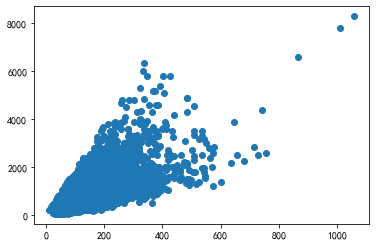

In [664]:
plt.scatter(x=bj.area,y=bj.totalPrice); # 散点图

In [665]:
bj[['area','totalPrice']].corr()

,area,totalPrice
area,1.000000,0.674146
totalPrice,0.674146,1.000000


# 房龄和房屋单价的关系

In [666]:
bins_build = [0,5,10,15,20,71]
bins_label = ['5年内','5到10年','10到15年','15到20年','20年以上']
bj['build_cut'] = pd.cut(bj.buildYear,bins=bins_build,right=True,labels=bins_label)

In [667]:
bj.head()

,totalPrice,unitPrice,county,halls,bedrooms,area,orient,decorateType,buildYear,banta,subway,floorType,priceCut,build_cut
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层,300-500万,10到15年
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层,1000万以上,5到10年
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层,300万以下,15到20年
3,1150.0,46825.0,昌平,5及以上,2,245.60,南,精装,21,板楼,0,低层,1000万以上,20年以上
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,低层,500-800万,15到20年


In [668]:
bj.build_cut.value_counts()

20年以上     11826
15到20年     8230
10到15年     5919
5到10年      5154
5年内         767
Name: build_cut, dtype: int64

In [669]:
bj.groupby('build_cut').unitPrice.describe()

,count,mean,std,min,25%,50%,75%,max
build_cut,,,,,,,,
5年内,767.0,50058.996089,24416.519233,13768.0,36985.50,45481.0,56498.5,190000.0
5到10年,5154.0,48549.536671,19543.930738,7898.0,36814.00,43572.5,55466.5,186493.0
10到15年,5919.0,56026.591147,23867.931593,11337.0,39820.50,49179.0,68002.0,189452.0
15到20年,8230.0,60338.023329,29566.504977,10484.0,38792.75,50130.0,78344.0,189101.0
20年以上,11826.0,69246.606038,33017.942073,11657.0,41242.50,60836.0,92805.5,189962.0


In [670]:
bj.groupby('build_cut').totalPrice.mean()

build_cut
5年内       656.045502
5到10年     560.307548
10到15年    623.156749
15到20年    650.419854
20年以上     513.445611
Name: totalPrice, dtype: float64

# 构建模型

In [671]:
bj.columns

Index(['totalPrice', 'unitPrice', 'county', 'halls', 'bedrooms', 'area',
       'orient', 'decorateType', 'buildYear', 'banta', 'subway', 'floorType',
       'priceCut', 'build_cut'],
      dtype='object')

In [672]:
# 查看各个特征和总价的相关性
pd.get_dummies(bj).corr()['totalPrice']

totalPrice            1.000000
unitPrice             0.545647
area                  0.674146
buildYear            -0.081684
subway                0.042659
county_东城             0.181657
county_丰台            -0.041975
county_大兴            -0.101667
county_密云            -0.024830
county_平谷            -0.037497
county_怀柔             0.022408
county_房山            -0.182149
county_昌平            -0.064442
county_朝阳             0.049308
county_海淀             0.200490
county_石景山           -0.079623
county_西城             0.237409
county_通州            -0.088141
county_门头沟           -0.091048
county_顺义            -0.054928
halls_1              -0.194595
halls_2              -0.255344
halls_3               0.167953
halls_5及以上            0.432866
bedrooms_0           -0.081548
bedrooms_1           -0.316901
bedrooms_2            0.298118
bedrooms_3            0.218722
bedrooms_4及以上         0.082378
orient_东              0.061154
orient_北             -0.036587
orient_南             -0.051148
orient_西

In [673]:
# 确定特征
features = ['county','halls','bedrooms','area']


In [674]:
# 选择特征列
data = bj[features]

In [675]:
# 特征预处理
data = pd.get_dummies(data)

In [676]:
# 确定标签
labels = bj['totalPrice']

In [677]:
# 数据集划分
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(data, labels) #得到训练集和测试基

In [678]:
# 构建线性回归模型
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [679]:
# 训练模型
lr.fit(x_train,y_train)

LinearRegression()

In [680]:
# 模型评估
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_predict = lr.predict(x_test)

In [681]:
mean_squared_error(y_test,y_predict)

49374.92276609915